# This notebook comparing the GAFF1 modelling data with the experimental value, taking the input from clustering.ipynb, in which all the results are in sampling/

In [1]:
import biceps 

import mdtraj as md
import numpy as np
import pandas as pd 
import os, pickle, string, shutil 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

BICePs - Bayesian Inference of Conformational Populations, Version 2.0


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


### Prepare NOE Distance

In [2]:
def compute_ensemble_avg_NOE(grouped_files, indices, outdir, verbose=False):
    indices = np_ind_noe
    for i, state in enumerate(grouped_files):
        for j, frame in enumerate(state):
            d = md.compute_distances(md.load(frame), indices) * 10. # convert nm to Å
        data = np.mean(d, axis=0)
        data = data.reshape(1, -1) # Reshape the data to have the shape (1, 8) instead of (8,)
        np.savetxt(f'{outdir}NOE_{i}.txt', data)
        print(f"save model NOE to: {outdir}NOE_{i}.txt ")

In [3]:
import os
import shutil

# Define the root directory
root = 'biceps/'

# Check if the directory exists
if os.path.exists(root):
    # Clear the contents if the directory exists
    shutil.rmtree(root)  # Remove the directory and its contents
    os.makedirs(root)    # Recreate the empty directory
    print(f"All content in '{root}' has been cleared ")
else:
    # Create the directory if it doesn't exist
    os.makedirs(root)
    print(f"'{root}' has been created.")


All content in 'biceps/' has been cleared 


In [4]:
# Store the Modeling and Experiment data NEO  
data_dir = 'biceps/data/'
biceps.toolbox.mkdir(data_dir)

# Define the atom pair indices for noe distance 
atom_indices = [
    [12, 31],
    [12, 32],
    [13, 31],
    [13, 32],
    [40, 53],
    [40, 54],
    [41, 53],
    [41, 54],
]

with open(f"{data_dir}atom_indice_noe.txt", 'w') as file:
    for pair in atom_indices:
        line = f"{pair[0]} {pair[1]}\n"
        file.write(line)
#recorded experimental state, and experimental NOE distance
exp_state_noe = [  
    [1, 3.5],
    [1, 3.5],
    [1, 3.5],
    [1, 3.5],
    [2, 3.2],
    [2, 3.2],
    [2, 3.2],
    [2, 3.2],
]

with open(f"{data_dir}noe_distance.txt", 'w') as file:
    for pair in exp_state_noe:
        line = f"{pair[0]} {pair[1]}\n"
        file.write(line)

In [5]:
outdir = 'biceps/_NOE/'
biceps.toolbox.mkdir(outdir)


# Create a grouped_file list 
grouped_files = []
ncluster = 8
for cluster in range(ncluster):
    sample = [f"sampling/sample_state_0_cluster{cluster}_whole.pdb"]
    grouped_files.append(sample)
#print(grouped_files)

# Create a index file for atomic indice and noe distance 
gmx_ind_noe = np.loadtxt(f"{data_dir}atom_indice_noe.txt")
#print(gmx_ind_noe)
if (type(gmx_ind_noe) != np.ndarray and type(gmx_ind_noe) != list):
    print(type(gmx_ind_noe))
np_ind_noe = gmx_ind_noe -1 #indices of numpy is indices of gmx - 1 
#print(np_ind_noe)
indices = np_ind_noe

# Compute the average NOE distance of samplings in each states (cluters) 
compute_ensemble_avg_NOE(grouped_files, indices, outdir)    

model_data_NOE = np.array([np.loadtxt(file) for file in biceps.toolbox.get_files(f"{outdir}*.txt")])
print(model_data_NOE)
exp_data_NOE = np.loadtxt(f"{data_dir}noe_distance.txt")

save model NOE to: biceps/_NOE/NOE_0.txt 
save model NOE to: biceps/_NOE/NOE_1.txt 
save model NOE to: biceps/_NOE/NOE_2.txt 
save model NOE to: biceps/_NOE/NOE_3.txt 
save model NOE to: biceps/_NOE/NOE_4.txt 
save model NOE to: biceps/_NOE/NOE_5.txt 
save model NOE to: biceps/_NOE/NOE_6.txt 
save model NOE to: biceps/_NOE/NOE_7.txt 
[[3.07240915 3.28143954 2.9935205  3.22145009 4.69365549 4.62628555
  4.6957798  4.5511179 ]
 [3.16349554 3.18051147 3.10849905 3.23441434 4.6850605  4.60081959
  4.72947741 4.59634209]
 [3.18865681 3.04241848 3.22719097 3.19785285 3.15152097 3.2976234
  2.95420861 3.28361058]
 [3.16227961 3.25055981 3.03963947 3.20807528 3.44946384 2.84301233
  3.48043132 3.08190465]
 [4.59412813 4.577878   4.58707571 4.60594988 3.23475647 2.98459005
  3.27312565 3.2223773 ]
 [4.64357138 4.58496714 4.58332634 4.52391481 2.88300967 3.50573635
  2.78401184 3.61439729]
 [4.49200296 4.61879873 4.57391644 4.66494417 4.7371769  4.61848307
  4.6937089  4.5151639 ]
 [4.1580534  4

In [6]:
outdir = 'biceps/NOE/'
biceps.toolbox.mkdir(outdir)

prep = biceps.Preparation(nstates=8, outdir=outdir) # nstate = number of cluster for sampling 
prep.prepare_noe(exp_data_NOE, model_data_NOE, indices = np_ind_noe, verbose=True)

   exp     model  restraint_index  atom_index1  atom_index2
0  3.5  3.072409                1           11           30
1  3.5  3.281440                1           11           31
2  3.5  2.993520                1           12           30
3  3.5  3.221450                1           12           31
4  3.2  4.693655                2           39           52
5  3.2  4.626286                2           39           53
6  3.2  4.695780                2           40           52
7  3.2  4.551118                2           40           53
Writing biceps/NOE/0.noe as pickle...
   exp     model  restraint_index  atom_index1  atom_index2
0  3.5  3.163496                1           11           30
1  3.5  3.180511                1           11           31
2  3.5  3.108499                1           12           30
3  3.5  3.234414                1           12           31
4  3.2  4.685061                2           39           52
5  3.2  4.600820                2           39           53
6 

In [7]:
input_data = prep.to_sorted_list()
print(input_data)

[['biceps/NOE/0.noe'], ['biceps/NOE/1.noe'], ['biceps/NOE/2.noe'], ['biceps/NOE/3.noe'], ['biceps/NOE/4.noe'], ['biceps/NOE/5.noe'], ['biceps/NOE/6.noe'], ['biceps/NOE/7.noe']]


In [8]:
pd.read_pickle(input_data[0][0])

,exp,model,restraint_index,atom_index1,atom_index2
0,3.5,3.072409,1,11,30
1,3.5,3.281440,1,11,31
2,3.5,2.993520,1,12,30
3,3.5,3.221450,1,12,31
4,3.2,4.693655,2,39,52
5,3.2,4.626286,2,39,53
6,3.2,4.695780,2,40,52
7,3.2,4.551118,2,40,53


### Prepare Energy

In [10]:
# Convert the Probability into Reduced Free Energy 
P = np.loadtxt('sampling/clusters_probability.dat') / 100
print(P, P.sum())
k_B = 1.38e-23  # Boltzmann constant (j/K)
T = 300  # (K)
energies = -np.log(P) # Calculate reduced free energy E using the equation E = ln(P) (KT)
energies -= energies.min() # set ground state to zero, just in case
print(f"Reduced Free Energy F: {energies} KT")

####### Data and Output Directories #######

# REQUIRED: specify directory of input data (BICePs readable format)
input_data = biceps.toolbox.sort_data('biceps/NOE/')

# REQUIRED: specify outcome directory of BICePs sampling
outdir = 'biceps/results/'
# Make a new directory if we have to
biceps.toolbox.mkdir(outdir)

[0.06675866 0.01653967 0.58284834 0.12281754 0.12247755 0.07149857
 0.01405972 0.00299994] 1.0
Reduced Free Energy F: [2.16684292 3.56216533 0.         1.55722715 1.55999927 2.09824957
 3.72461313 5.26933473] KT


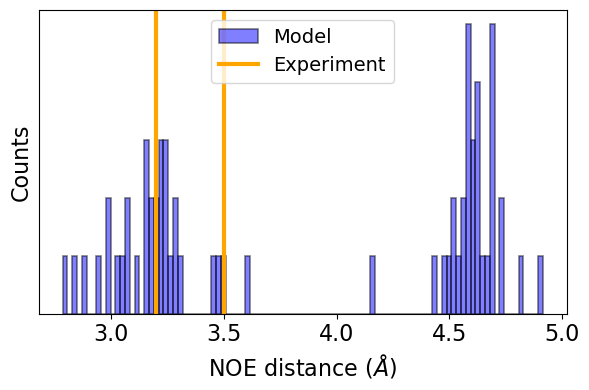

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0,0])
data1 = pd.concat([pd.read_pickle(i) for i in biceps.toolbox.get_files('biceps/NOE/*.noe')])
ax1 = data1["model"].plot.hist(alpha=0.5, bins=100, edgecolor='black', linewidth=1.2, color="b", label="Model")

# Ensure each experimental value is plotted as a separate vertical line
for exp_value in set(data1["exp"].to_numpy()):
    ax1.axvline(exp_value, c="orange", linewidth=3, label="Experiment")

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), fontsize=14)
ax1.set_xlabel(r"NOE distance ($\AA$)", size=16)
ax1.set_ylabel("Counts", size=16)
ax1.axes.get_yaxis().set_ticks([])
ticks = [ax1.xaxis.get_minor_ticks(), ax1.xaxis.get_major_ticks()]
xmarks = [ax1.get_xticklabels()]
for k in range(0, len(ticks)):
    for tick in ticks[k]:
        tick.label1.set_fontsize(16)  # Corrected to tick.label1
for k in range(0, len(xmarks)):
    for mark in xmarks[k]:
        mark.set_fontsize(16)
        mark.set_rotation(0)
fig.tight_layout()
fig.savefig('biceps/histogram_of_NOE_observables.pdf', dpi=600)
plt.show()

In [12]:
nsteps = 5e6 
burn = 1e5
n_lambdas = 2
lambda_values = np.linspace(0.0, 1.0, n_lambdas)

In [13]:
#pd.DataFrame(biceps.get_restraint_options())
options = biceps.get_restraint_options(input_data)
pd.DataFrame(options)

,ref,sigma,use_global_ref_sigma,extension,weight,file_fmt,log_normal,gamma
0,uniform,"[0.05, 20.0, 1.02]",True,noe,1,pickle,False,"[0.2, 10.0, 1.01]"


In [14]:
options[0]

{'ref': 'uniform',
 'sigma': [0.05, 20.0, 1.02],
 'use_global_ref_sigma': True,
 'extension': 'noe',
 'weight': 1,
 'file_fmt': 'pickle',
 'log_normal': False,
 'gamma': [0.2, 10.0, 1.01]}

In [15]:
# Multiprocess trajectories for each $\lambda$-value with a built-in decorator
@biceps.multiprocess(iterable=lambda_values)
def mp_lambdas(lam):
    ensemble = biceps.Ensemble(lam, energies)
    ensemble.initialize_restraints(input_data, options)
    sampler = biceps.PosteriorSampler(ensemble)
    sampler.sample(nsteps=nsteps, burn=burn, print_freq=1000, verbose=False)
    filename = os.path.join(outdir,'traj_lambda%2.2f.npz'%(lam))
    sampler.traj.process_results(filename)
    biceps.toolbox.save_object(sampler, filename.replace(".npz", ".pkl"))

Number of CPUs: 8
Number of processes: 2


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████  | 5000000/5100000.0 [02:34<00:03, 32460.32it/s]



Accepted 58.14135294117647 % 


Accepted [ ...Nuisance paramters..., state] %
Accepted [48.01443137 48.01443137 10.12692157] % 



 98%|██████████████████████████████████████████████████████████████████████████████████████████████████  | 5000000/5100000.0 [02:35<00:03, 32090.46it/s]



Accepted 73.23580392156863 % 


Accepted [ ...Nuisance paramters..., state] %
Accepted [48.36543137 48.36543137 24.87037255] % 



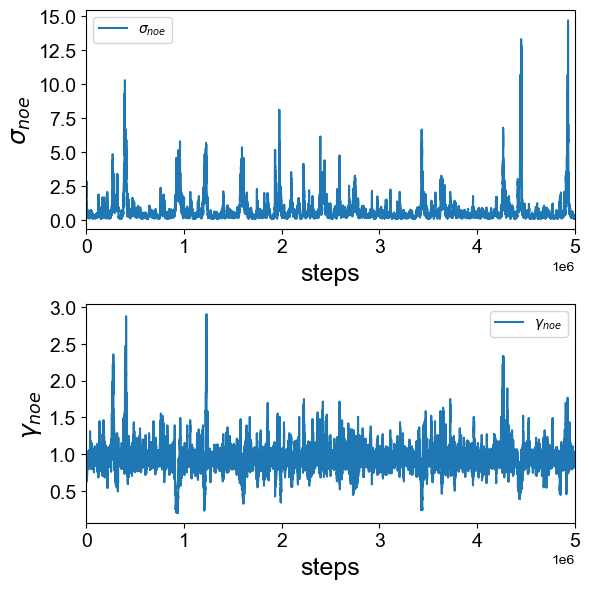

In [60]:
convergence = biceps.Convergence(filename=os.path.join(outdir,"traj_lambda1.00.npz"), outdir=outdir)
convergence.plot_traces(figname="traces.pdf", xlim=(0, nsteps))

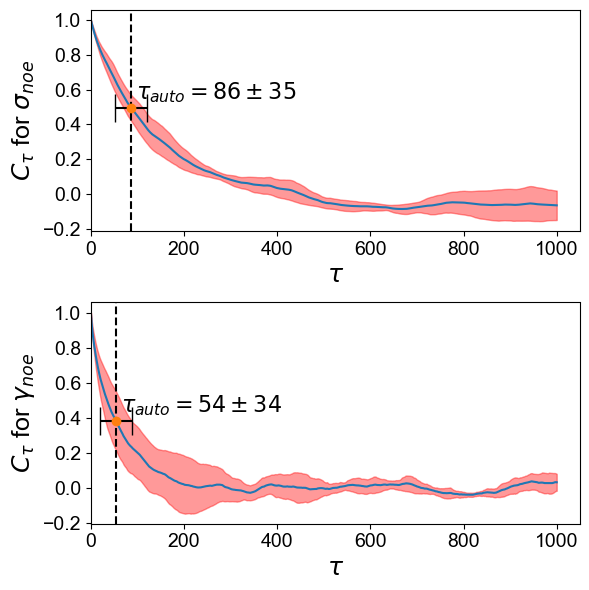

In [61]:
convergence.get_autocorrelation_curves(method="block-avg-auto", maxtau=1000, nblocks=5)

BICePs Scores = [ 0.        -0.5504165]


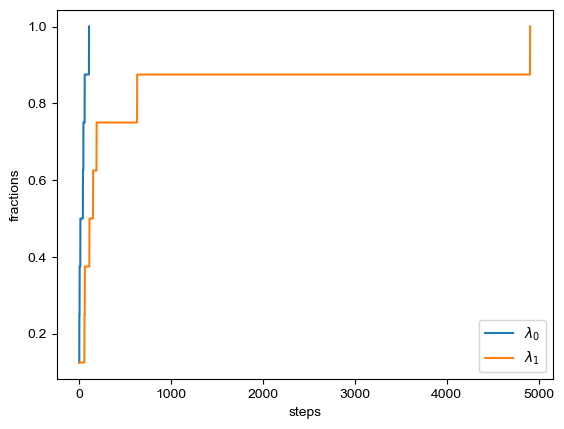

In [62]:
############ MBAR and Figures ###########
%matplotlib inline
# Let's do analysis using MBAR algorithm and plot figures
A = biceps.Analysis(outdir, nstates=len(energies))
biceps.toolbox.save_object(A, "analysis_object.pkl")
#pops = A.P_dP[:,n_lambdas-1]
pops, BS = A.P_dP, A.f_df
print(f"BICePs Scores = {BS[:,0]}")

In [63]:
import pickle
with open("analysis_object.pkl", 'rb') as f:
    A = pickle.load(f)

AttributeError: 'XTick' object has no attribute 'label'

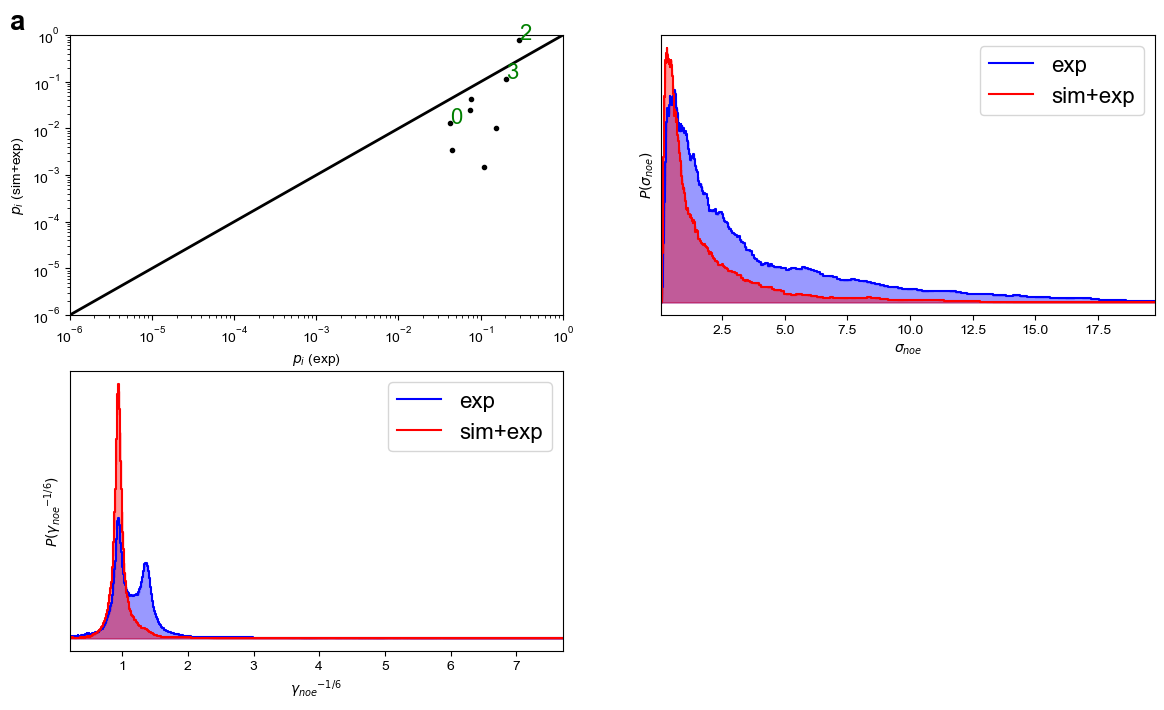

In [64]:
pops, BS = A.P_dP, A.f_df
pops0, pops1 = pops[:, 0], pops[:, len(lambda_values) - 1]

legend_fontsize = 16
label_fontsize = 18

# Plot the figure with 'step' plot type, but without setting label font size to avoid errors
fig = A.plot(plottype="step", figname="BICePs_.pdf", figsize=(14, 8),
             label_fontsize=None, legend_fontsize=legend_fontsize)
ax = fig.axes[0]

# Update tick label font size using tick_params
ax.tick_params(axis='both', which='major', labelsize=label_fontsize)
ax.tick_params(axis='both', which='minor', labelsize=label_fontsize)

# Highlight specific high energy conformations
high_E_confs = [79, 21]  # Add any other indices you need
for i in high_E_confs:
    ax.text(pops0[i], pops1[i], str(i), color='r', fontsize=legend_fontsize)

# Save the figure
output_path = os.path.join(outdir, "BICePs.pdf")
fig.savefig(output_path, dpi=600)
plt.show()

In [65]:
mlp = pd.concat([A.get_max_likelihood_parameters(model=i) for i in range(len(lambda_values))])
mlp.reset_index(inplace=True, drop=True)
mlp

,sigma_noe,gamma_noe
0,0.606166,0.944418
1,0.285618,0.944418


AttributeError: 'XTick' object has no attribute 'label'

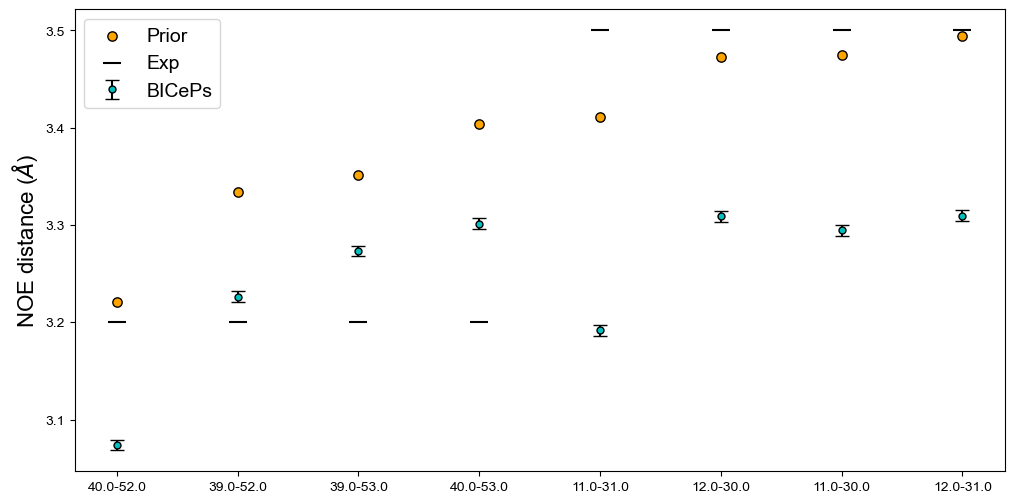

In [68]:
import uncertainties as u

pops_std = A.P_dP[:,-1]

# NOTE: Get Prior MDS populations
prior_pops = np.loadtxt('sampling/clusters_probability.dat') / 100
prior_pops /= prior_pops.sum()

noe = [pd.read_pickle(i) for i in biceps.toolbox.get_files(f"biceps/NOE/*.noe")]
#  Get the ensemble average observable
noe_Exp = noe[0]["exp"].to_numpy()
noe_model = [i["model"].to_numpy() for i in noe]

noe_prior = np.array([w*noe_model[i] for i,w in enumerate(prior_pops)]).sum(axis=0)
noe_reweighted = np.array([u.ufloat(w, pops_std[i])*noe_model[i] for i,w in enumerate(pops[:,n_lambdas-1])]).sum(axis=0)

distance_labels = [f"{row[1]['atom_index1']}-{row[1]['atom_index2']}" for row in noe[0].iterrows()]
distance_label_indices = np.array([[row[1]['atom_index1'], row[1]['atom_index2']] for row in noe[0].iterrows()])

# Plot NOE data
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])
data = []

for i in range(len(noe_reweighted)):
    data.append({
        "index": i,
        "reweighted noe": noe_reweighted[i],
        "prior noe": noe_prior[i],
       # "exp noe": noe_Exp[i] * mlp['gamma_noe'].to_numpy()[-1],
        "exp noe": noe_Exp[i],
        "label": distance_labels[i]
    })

data1 = pd.DataFrame(data)
data1 = data1.sort_values(["prior noe"]).reset_index()

reweighted_vals = np.array([val.nominal_value for val in data1["reweighted noe"].to_numpy()])
reweighted_std = np.array([val.std_dev for val in data1["reweighted noe"].to_numpy()])

ax1.scatter(x=data1["label"].to_numpy(), y=data1["prior noe"].to_numpy(),
            s=45, color="orange", label="Prior", edgecolor='black')
ax1.scatter(x=data1["label"].to_numpy(), y=data1["exp noe"].to_numpy(),
            s=150, marker="_", color="k", label="Exp")
ax1.errorbar(x=data1['label'].to_numpy(), y=reweighted_vals,
             yerr=reweighted_std, fmt="o", capsize=5,
             markersize=5, markerfacecolor="c", label="BICePs",
             ecolor="k", markeredgecolor='black')

ax1.legend(fontsize=14)
ax1.set_ylabel(r"NOE distance ($\AA$)", size=16)

# Customize ticks and labels
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for label in ax1.get_xticklabels():
    label.set_size(16)
    label.set_rotation(65)
for label in ax1.get_yticklabels():
    label.set_size(16)

fig.tight_layout()
fig.savefig(f"{outdir}/reweighted_NOE_observables.pdf", dpi=500)
plt.show()


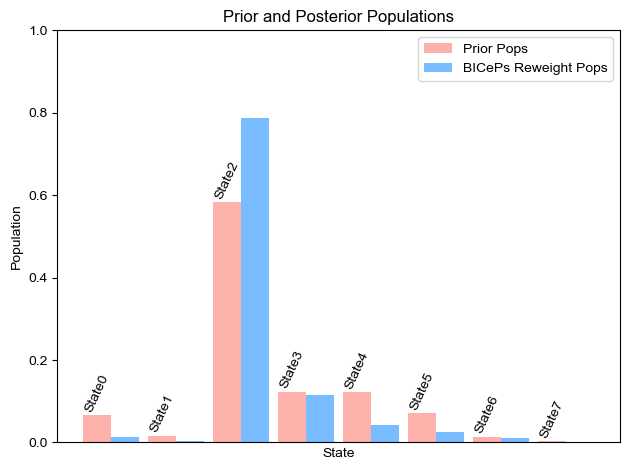

In [54]:
# After you have called on A = biceps.Analysis(#inputs)
pops, BS = A.P_dP, A.f_df
pops0,pops1 = pops[:,0], pops[:,len(lambda_values)-1]

# NOTE: Get Prior MDS populations
prior_pops = np.loadtxt('sampling/clusters_probability.dat') / 100
prior_pops /= prior_pops.sum()

n_bars = 8
bar_width = 0.5
interval = 0.15
indices = np.arange(n_bars) * (2*bar_width + interval)

fig, ax = plt.subplots()

# Plot prior_pops
ax.bar(indices, height=prior_pops, width=bar_width, label='Prior Pops', alpha=0.6, color='salmon')

# Plot pops1
ax.bar(indices + bar_width, height=pops1, width=bar_width, label='BICePs Reweight Pops', alpha=0.6, color='dodgerblue')

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Population')
ax.set_ylim(0,1)
ax.set_title('Prior and Posterior Populations')
ax.legend()
ax.set_xticks([])
for i in range(n_bars):
    ax.text(indices[i] , prior_pops[i] + 0.01, f"State{i}", ha ='center', rotation=65)
    #ax.text(indices[i] + bar_width, pops1[i] + 0.01, f'State {i} ', ha='center', rotation=65)


fig.tight_layout()
fig.savefig(f"{outdir}/prior_reweight_population.png", dpi=500)
plt.show()


In [24]:
print(lambda_values)

[0. 1.]
